# Covid-19

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df = pd.read_csv('owid-covid-data.csv')
df.shape


(75757, 59)

In [25]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [26]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               75757 non-null  object 
 1   continent                              72033 non-null  object 
 2   location                               75757 non-null  object 
 3   date                                   75757 non-null  object 
 4   total_cases                            74515 non-null  float64
 5   new_cases                              74513 non-null  float64
 6   new_cases_smoothed                     73512 non-null  float64
 7   total_deaths                           65246 non-null  float64
 8   new_deaths                             65404 non-null  float64
 9   new_deaths_smoothed                    73512 non-null  float64
 10  total_cases_per_million                74109 non-null  float64
 11  ne

In [45]:
df.isnull().sum()

iso_code                                     0
continent                                 3724
location                                     0
date                                         0
total_cases                               1242
new_cases                                 1244
new_cases_smoothed                        2245
total_deaths                             10511
new_deaths                               10353
new_deaths_smoothed                       2245
total_cases_per_million                   1648
new_cases_per_million                     1650
new_cases_smoothed_per_million            2646
total_deaths_per_million                 10904
new_deaths_per_million                   10746
new_deaths_smoothed_per_million           2646
reproduction_rate                        15005
icu_patients                             67998
icu_patients_per_million                 67998
hosp_patients                            66420
hosp_patients_per_million                66420
weekly_icu_ad

In [11]:
#missingno.matrix(df,figsize=(90,60))

df1 = df[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'reproduction_rate', 'icu_patients', 
        'hosp_patients', 'new_tests', 'total_tests',
       'new_tests_smoothed',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred','stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
        'gdp_per_capita', 'extreme_poverty',
       'life_expectancy', 'human_development_index']]
df1.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,people_fully_vaccinated_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,8.33,38928341.0,54.422,18.6,2.581,1803.987,NaN,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,8.33,38928341.0,54.422,18.6,2.581,1803.987,NaN,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,8.33,38928341.0,54.422,18.6,2.581,1803.987,NaN,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,8.33,38928341.0,54.422,18.6,2.581,1803.987,NaN,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,8.33,38928341.0,54.422,18.6,2.581,1803.987,NaN,64.83,0.511


In [14]:
df1.shape

(75757, 35)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             75757 non-null  object 
 1   continent                            72033 non-null  object 
 2   location                             75757 non-null  object 
 3   date                                 75757 non-null  object 
 4   total_cases                          74515 non-null  float64
 5   new_cases                            74513 non-null  float64
 6   new_cases_smoothed                   73512 non-null  float64
 7   total_deaths                         65246 non-null  float64
 8   new_deaths                           65404 non-null  float64
 9   new_deaths_smoothed                  73512 non-null  float64
 10  reproduction_rate                    60752 non-null  float64
 11  icu_patients                

In [16]:
df1.isnull().sum()

iso_code                                   0
continent                               3724
location                                   0
date                                       0
total_cases                             1242
new_cases                               1244
new_cases_smoothed                      2245
total_deaths                           10511
new_deaths                             10353
new_deaths_smoothed                     2245
reproduction_rate                      15005
icu_patients                           67998
hosp_patients                          66420
new_tests                              41592
total_tests                            41812
new_tests_smoothed                     36753
positive_rate                          38037
tests_per_case                         38616
total_vaccinations                     71039
people_vaccinated                      71522
people_fully_vaccinated                72930
new_vaccinations                       71729
new_vaccin

In [45]:
df1['continent'].isnull().sum()

3724

In [37]:
df1[df1['continent'].isnull()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,icu_patients,hosp_patients,new_tests,total_tests,new_tests_smoothed,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
389,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74679,OWID_WRL,NaN,World,2021-03-14,119875203.0,360151.0,423074.714,2653652.0,5490.0,8579.000,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,374168528.0,220856835.0,83093186.0,16597466.0,9609599.0,4.80,2.83,1.07,NaN,7.794799e+09,58.045,30.9,8.696,15469.207,10.0,72.58,0.737
74680,OWID_WRL,NaN,World,2021-03-15,120218060.0,342857.0,429403.714,2660456.0,6804.0,8573.286,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383911629.0,227682263.0,85996240.0,9743101.0,10017091.0,4.93,2.92,1.10,NaN,7.794799e+09,58.045,30.9,8.696,15469.207,10.0,72.58,0.737
74681,OWID_WRL,NaN,World,2021-03-16,120697035.0,478975.0,438497.857,2670453.0,9997.0,8578.286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391888143.0,232763824.0,88527988.0,7976514.0,10180924.0,5.03,2.99,1.14,NaN,7.794799e+09,58.045,30.9,8.696,15469.207,10.0,72.58,0.737
74682,OWID_WRL,NaN,World,2021-03-17,121197710.0,500675.0,443294.571,2680445.0,9992.0,8624.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400277966.0,238031778.0,91626189.0,8389823.0,10125199.0,5.14,3.05,1.18,NaN,7.794799e+09,58.045,30.9,8.696,15469.207,10.0,72.58,0.737


In [30]:
print(df1['location'].nunique())
df1['location'].unique()

215


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'European Union', 'Faeroe Islands', 'Falkland Islands',
       'Fiji', 'Finland', 'Fran

In [46]:
df1['continent'].value_counts()

Africa           19908
Europe           18288
Asia             18075
North America     8966
South America     4608
Oceania           2188
Name: continent, dtype: int64

In [70]:
df1['continent'].isnull().sum()

3724

In [43]:
df1['location'][df1['continent'].isnull()].unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'International',
       'North America', 'Oceania', 'South America', 'World'], dtype=object)

In [54]:
df1['location'][df1['continent'].isnull()].value_counts()

North America     422
World             422
Asia              422
Europe            421
European Union    421
Oceania           419
International     406
Africa            400
South America     391
Name: location, dtype: int64

<AxesSubplot:>

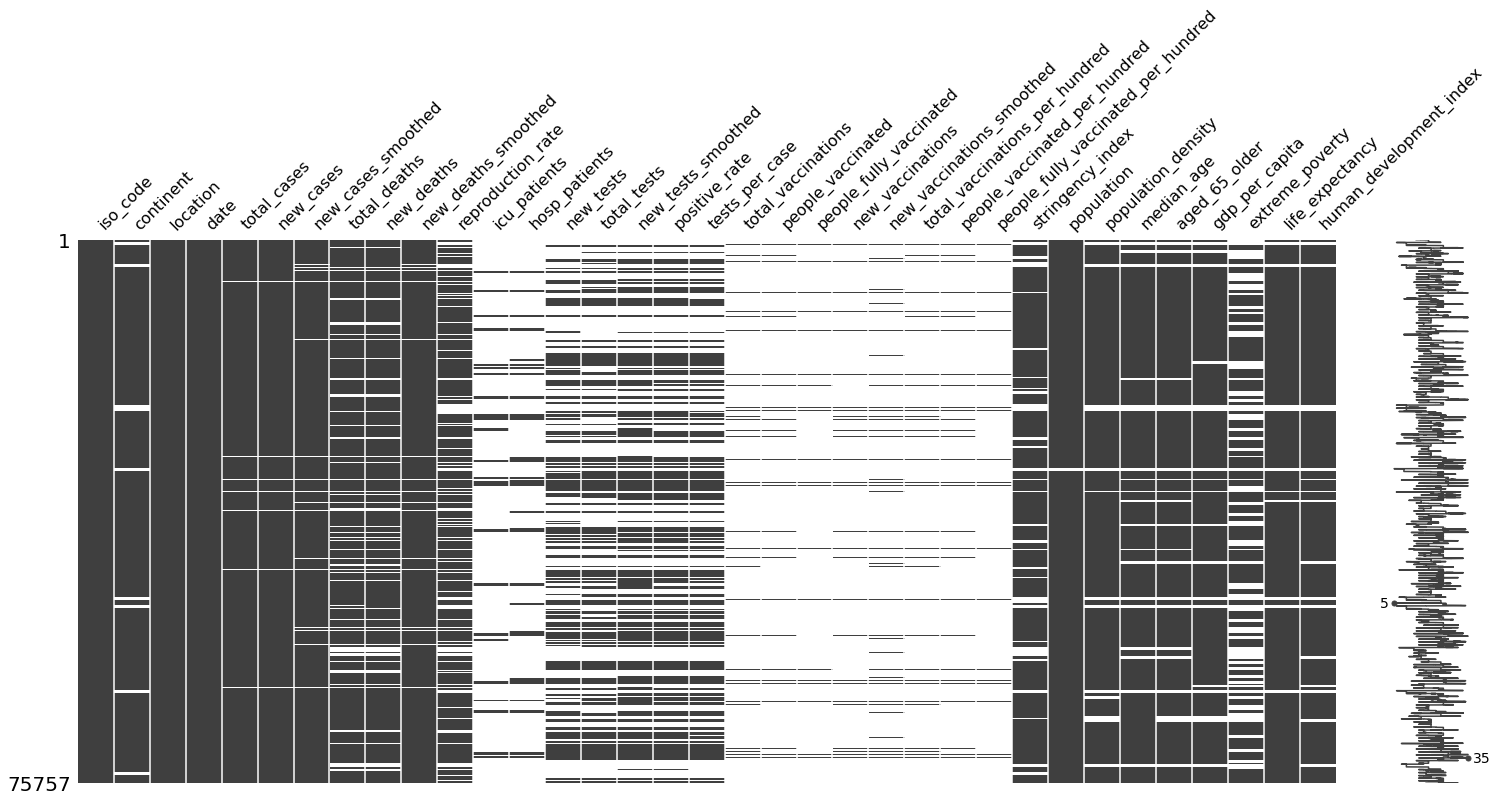

In [58]:
missingno.matrix(df1)

In [69]:
df1.loc[df1['location'].isin(['Africa','Asia'])]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,icu_patients,hosp_patients,new_tests,total_tests,new_tests_smoothed,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
389,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.340598e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,OWID_ASI,NaN,Asia,2021-03-14,26182800.0,90607.0,88182.571,410138.0,752.0,828.286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140500363.0,53336270.0,16959828.0,13544622.0,4036280.0,3.03,1.15,0.37,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3964,OWID_ASI,NaN,Asia,2021-03-15,26276669.0,93869.0,90265.857,410981.0,843.0,821.857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144891058.0,56693061.0,17884744.0,4390695.0,4271878.0,3.12,1.22,0.39,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3965,OWID_ASI,NaN,Asia,2021-03-16,26379025.0,102356.0,93001.857,411960.0,979.0,841.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148681105.0,59170843.0,18842784.0,3790047.0,4458006.0,3.20,1.28,0.41,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3966,OWID_ASI,NaN,Asia,2021-03-17,26494349.0,115324.0,96658.286,412827.0,867.0,850.571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152222627.0,61424211.0,19819503.0,3541522.0,4560478.0,3.28,1.32,0.43,NaN,4.639847e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
location_index = df1[df1['location'].isin(['Africa','Asia', 'Europe', 'European Union', 'International',
       'North America', 'Oceania', 'South America', 'World'])].index
location_index

Int64Index([  389,   390,   391,   392,   393,   394,   395,   396,   397,
              398,
            ...
            74674, 74675, 74676, 74677, 74678, 74679, 74680, 74681, 74682,
            74683],
           dtype='int64', length=3724)

In [81]:
df1.drop(location_index, inplace = True)

In [85]:
df1.shape

(72033, 35)

<AxesSubplot:>

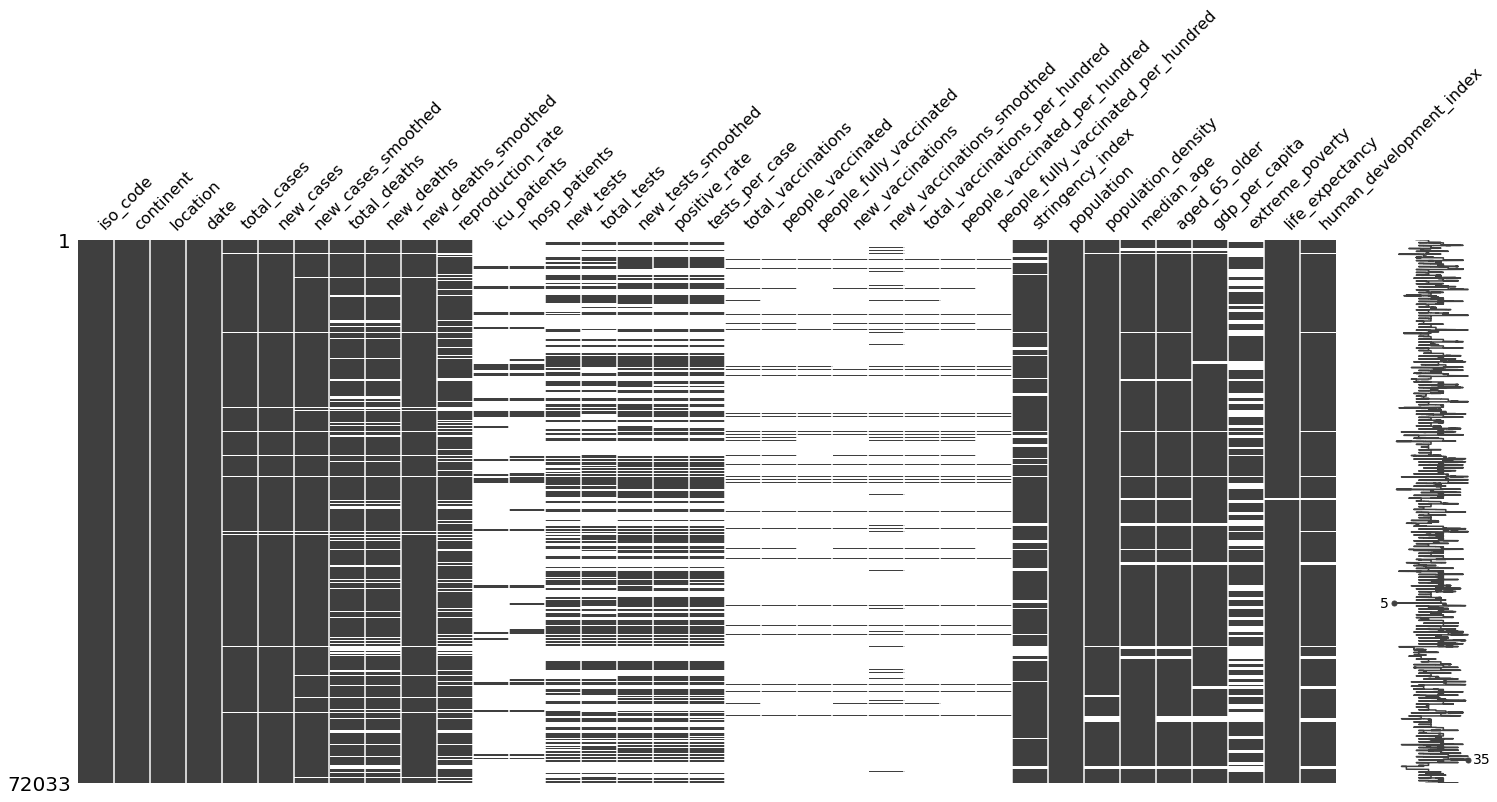

In [86]:
missingno.matrix(df1)

In [87]:
df1['continent'].isnull().sum()

0

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72033 entries, 0 to 75756
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             72033 non-null  object 
 1   continent                            72033 non-null  object 
 2   location                             72033 non-null  object 
 3   date                                 72033 non-null  object 
 4   total_cases                          70796 non-null  float64
 5   new_cases                            70789 non-null  float64
 6   new_cases_smoothed                   69841 non-null  float64
 7   total_deaths                         61694 non-null  float64
 8   new_deaths                           61693 non-null  float64
 9   new_deaths_smoothed                  69841 non-null  float64
 10  reproduction_rate                    60334 non-null  float64
 11  icu_patients                

In [90]:
df1.to_csv('covid_data.csv', index=False)

In [92]:
df2 = pd.read_csv('covid_data.csv')
df2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,reproduction_rate,icu_patients,hosp_patients,new_tests,total_tests,new_tests_smoothed,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1803.987,NaN,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1803.987,NaN,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1803.987,NaN,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1803.987,NaN,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1803.987,NaN,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72028,ZWE,Africa,Zimbabwe,2021-03-14,36484.0,13.0,30.429,1503.0,2.0,2.571,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36359.0,36359.0,NaN,0.0,588.0,0.24,0.24,NaN,48.15,14862927.0,42.729,19.6,2.822,1899.775,21.4,61.49,0.571
72029,ZWE,Africa,Zimbabwe,2021-03-15,36504.0,20.0,30.714,1504.0,1.0,2.429,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37660.0,37660.0,NaN,1301.0,306.0,0.25,0.25,NaN,48.15,14862927.0,42.729,19.6,2.822,1899.775,21.4,61.49,0.571
72030,ZWE,Africa,Zimbabwe,2021-03-16,36535.0,31.0,30.571,1507.0,3.0,2.571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39550.0,39550.0,NaN,1890.0,541.0,0.27,0.27,NaN,NaN,14862927.0,42.729,19.6,2.822,1899.775,21.4,61.49,0.571
72031,ZWE,Africa,Zimbabwe,2021-03-17,36552.0,17.0,30.143,1508.0,1.0,2.714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39607.0,39607.0,NaN,57.0,529.0,0.27,0.27,NaN,NaN,14862927.0,42.729,19.6,2.822,1899.775,21.4,61.49,0.571
